# Tutorial 1: Clean and create astronomy data
 

## Introduction

In this tutorial you will:
-  Data Visualization 
-  Clean the data
-  Extract astronomy features and create others that might be of some importance
## Let's get started!

In [1]:
print(4)

4


#### Reading a fit format data 

In [1]:
# ___Cell no. 1___

import astropy.io.fits as fits  #package provides access to FITS file format

filename = '/idia/projects/hippo/astroml/data/sdss_all_large_dr16_red_catwise.fits.gz'
fitsFile = fits.open(filename, memmap=True)

# Patince it does take some time

#### Convert the fits file into a dataframe

In [3]:
# ___Cell no. 2___

from astropy.table import Table
# is there is a way to make those lines to run faster ? ?  ? ? ? ?
table_data = Table(fitsFile[1].data) 
df = table_data.to_pandas()

# Patience it does take some time

#### Now to take a look at the data

In [4]:
print(df.head(5)) # shows the first 5 elements in the dataframe.

                 objID          ra        dec     raErr    decErr  type  \
0  1237679479084155171    8.104365  23.669649  0.021190  0.021140     6   
1  1237678617411322668  345.189621   1.194889  0.037775  0.037008     3   
2  1237678617411322688  345.202994   1.163524  0.035891  0.042338     3   
3  1237678617411387839  345.225493   1.184593  0.017604  0.015682     6   
4  1237679434519347440    1.967231  -2.747982  0.015730  0.014864     6   

   skyVersion   run  rerun  camcol  ...  k2  km   plx1  e_plx1   plx2  e_plx2  \
0           2  7917    301       6  ...   3   3  0.191   0.109  0.180   0.109   
1           2  7717    301       1  ...   3   3 -0.057   0.077 -0.038   0.076   
2           2  7717    301       1  ...   3   3 -0.052   0.067 -0.056   0.068   
3           2  7717    301       1  ...   3   3  1.723   0.412  1.680   0.413   
4           2  7907    301       3  ...   3   3  0.202   0.164  0.200   0.159   

     Sep   ccf  abfl   angDist  
0  0.555  0000    00  0.13850

#### Data summary

The data contains the following
- Wise features
- ModelMag features
- CModelMag features
- PSFMag features
- the class of the space object
- and many more, but the above is what we are interested in.


### Clean the data

#### Currently we are only Interested in the Model_Mag+Wise features & the class if the object

In [5]:
data_Model = df[['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z', 'W1mproPM', 'W2mproPM', 'specclass']]

#### the variabls names above are very long, let us make it shorter

In [6]:
data_Model = data_Model.rename({'modelMag_u':'Mu', 'modelMag_g':'Mg', 'modelMag_r':'Mr',
                      'modelMag_i':'Mi', 'modelMag_z':'Mz', 'W1mproPM':'W1', 'W2mproPM':'W2'}, axis='columns')

In [7]:
print(data_Model.columns)

Index(['Mu', 'Mg', 'Mr', 'Mi', 'Mz', 'W1', 'W2', 'specclass'], dtype='object')


#### remove NAN values if it exists

In [8]:
cleanedData_Model = data_Model.dropna()

In [9]:
print(cleanedData_Model.head(5))
print() # creats a line
print("Dataframe dimension: "+ str(cleanedData_Model.shape) ) # shape funtion needs to be converted to str (string) type for it to work 

          Mu         Mg         Mr         Mi         Mz         W1  \
0  20.391554  20.329977  20.306154  20.072433  19.909691  19.481000   
1  22.861437  21.111048  20.074354  19.361259  19.039858  18.680000   
2  22.322790  22.327713  20.546944  19.670311  19.139175  18.357000   
3  21.926924  21.073366  20.722250  20.736134  20.519217  20.429000   
4  21.875925  20.828112  20.517542  20.628027  20.329777  19.741999   

          W2                         specclass  
0  19.015000  QSO                               
1  19.090000  GALAXY                            
2  19.007000  GALAXY                            
3  20.520999  QSO                               
4  19.622001  QSO                               

Dataframe dimension: (3500958, 8)


#### there is a problem with spaces in the specclass, let us fix it (not an ideal way of doing it)

In [10]:
cleanedData_Model['specclass'] = cleanedData_Model['specclass'].str.strip()


In [11]:
print(cleanedData_Model.head(5))
print() # creats an empty line
print("Dataframe dimension: "+ str(cleanedData_Model.shape) ) # shape funtion needs to be converted to str (string) type for it to work 

          Mu         Mg         Mr         Mi         Mz         W1  \
0  20.391554  20.329977  20.306154  20.072433  19.909691  19.481000   
1  22.861437  21.111048  20.074354  19.361259  19.039858  18.680000   
2  22.322790  22.327713  20.546944  19.670311  19.139175  18.357000   
3  21.926924  21.073366  20.722250  20.736134  20.519217  20.429000   
4  21.875925  20.828112  20.517542  20.628027  20.329777  19.741999   

          W2 specclass  
0  19.015000       QSO  
1  19.090000    GALAXY  
2  19.007000    GALAXY  
3  20.520999       QSO  
4  19.622001       QSO  

Dataframe dimension: (3500958, 8)


#### Now let us look at the classes that the data has.

In [14]:
import numpy as np

classes = cleanedData_Model['specclass']
classnames, labels = np.unique(np.array(classes), return_inverse=True)



In [15]:
for i,j in zip(classnames, np.unique(labels)):
    print(str(np.char.rstrip(i)) + ", "+str(j)) # rstrip delets white spaces on the right of a word

GALAXY, 0
QSO, 1
STAR, 2


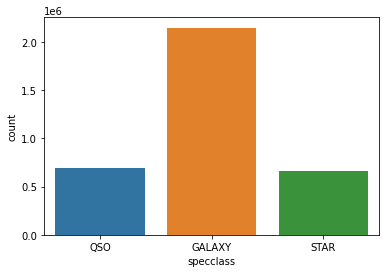

In [16]:
import seaborn as sns

ax = sns.countplot(x="specclass",data=cleanedData_Model)


there is a serious class imbalance that is shown in the above figure

In [17]:
print("the freq in numbers:\n") # '\n' creates a new line

print( "Galaxies: " + str(len(np.where(labels == 0)[0]) )) # Galaxy
print( "QSOs: " + str(len(np.where(labels == 1)[0]) )) # QSO
print(  "Stars: " + str(len(np.where(labels == 2)[0]) )) # Star

the freq in numbers:

Galaxies: 2145521
QSOs: 689934
Stars: 665503


#### Now to visualise the features 

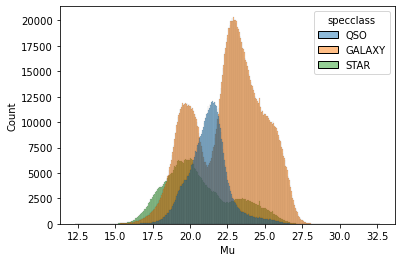

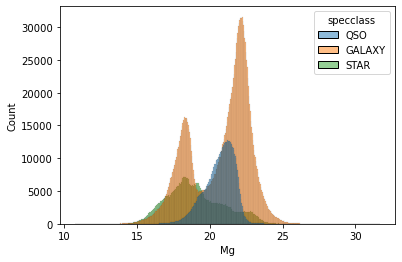

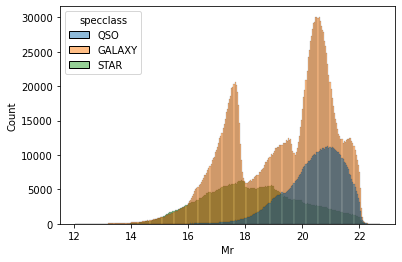

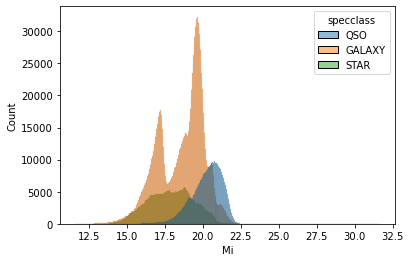

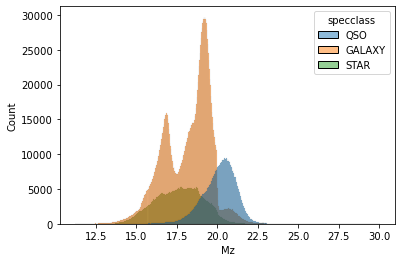

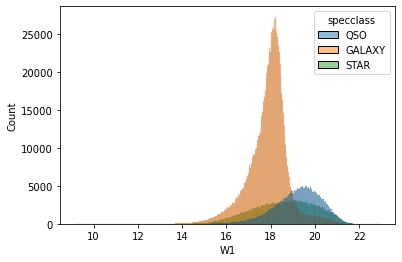

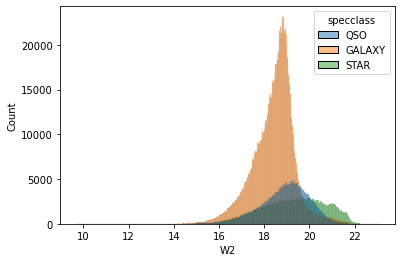

In [18]:
import matplotlib.pyplot as plt

arr = ['Mu', 'Mg', 'Mr', 'Mi', 'Mz', 'W1', 'W2']
for feat in arr:
    sns.histplot(data=cleanedData_Model, x=feat, hue="specclass")
    plt.show()

#### creating color features

In [19]:
cleanedData_Model['Mu-g'] = cleanedData_Model['Mu']- cleanedData_Model['Mg']
cleanedData_Model['Mu-r'] = cleanedData_Model['Mu']- cleanedData_Model['Mr']
cleanedData_Model['Mu-i'] = cleanedData_Model['Mu']- cleanedData_Model['Mi']
cleanedData_Model['Mu-z'] = cleanedData_Model['Mu']- cleanedData_Model['Mz']

cleanedData_Model['Mg-r'] = cleanedData_Model['Mg']- cleanedData_Model['Mr']
cleanedData_Model['Mg-i'] = cleanedData_Model['Mg']- cleanedData_Model['Mi']
cleanedData_Model['Mg-z'] = cleanedData_Model['Mg']- cleanedData_Model['Mz']

cleanedData_Model['Mr-i'] = cleanedData_Model['Mr']- cleanedData_Model['Mi']
cleanedData_Model['Mr-z'] = cleanedData_Model['Mr']- cleanedData_Model['Mz']

cleanedData_Model['Mi-z'] = cleanedData_Model['Mi']-cleanedData_Model['Mz']

In [20]:
print(cleanedData_Model.shape) # so we added exactly 10 features/colors

(3500958, 18)


#### adding WISE colors

In [21]:
cleanedData_Model['Mu-w1'] = cleanedData_Model['Mu']- cleanedData_Model['W1']
cleanedData_Model['Mu-w2'] = cleanedData_Model['Mu']- cleanedData_Model['W2']

cleanedData_Model['Mg-w1'] = cleanedData_Model['Mg']- cleanedData_Model['W1']
cleanedData_Model['Mg-w2'] = cleanedData_Model['Mg']- cleanedData_Model['W2']

cleanedData_Model['Mr-w1'] = cleanedData_Model['Mr']- cleanedData_Model['W1']
cleanedData_Model['Mr-w2'] = cleanedData_Model['Mr']- cleanedData_Model['W2']

cleanedData_Model['Mi-w1'] = cleanedData_Model['Mi']- cleanedData_Model['W1']
cleanedData_Model['Mi-w2'] = cleanedData_Model['Mi']- cleanedData_Model['W2']


cleanedData_Model['Mz-w1'] = cleanedData_Model['Mz']- cleanedData_Model['W1']
cleanedData_Model['Mz-w2'] = cleanedData_Model['Mz']- cleanedData_Model['W2']

cleanedData_Model['Mw1-w2'] = cleanedData_Model['W1']- cleanedData_Model['W2']




In [22]:
print(cleanedData_Model.shape)
print( "Rows: "+ str(cleanedData_Model.shape[0]) )
print( "Col: "+ str(cleanedData_Model.shape[1]) ) # where there are about 28 features, and the extra is for the output "specclass"

(3500958, 29)
Rows: 3500958
Col: 29


Data splitting: create two arrays, input 'x' (features) and output 'y'

#### Now dealing with this amount of features is a difficult task, therefore we have to make a shortlist of the most important features aka "feature reduction". The following can be used for feature reduction:

#### Manual: where a user can manually select the most relevant features
-  Permutation feature importance
-  Feature correlation
* the selected features can then be used for further analysis
#### Automatic feature reduction: where features are reduced automatically:
 
- principal component analysis
- CNNs (deep learning)

## Feature reduction

- In this section, we will show how we reduce the features using "feature permutation".
- But first, we need to split the data into training and a testing set

In [23]:
X = cleanedData_Model.drop(['specclass'], axis = 1)
y = np.array(labels)
print(X.shape) # our input
print(y.shape) # our input

(3500958, 28)
(3500958,)


To avoid data leakage, we need to perform feature permutation only on a training set, therefore we need to split the data

In [24]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, y, test_size = 0.4, random_state=3, stratify=y) # train and valid sets


In [25]:
print(Xtrain.shape)
print(Xtest.shape)

(2100574, 28)
(1400384, 28)


In [38]:
from matplotlib import pyplot
from random import randrange
import random
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

attrNames = np.array(X.columns)
featureImport = []


In [39]:

# https://www.kaggle.com/dansbecker/permutation-importance

for i in range (3): # take the average of 3 permutations, with different sizes and random splits (you can increase the number for it to be more robust)
    print("itr: " + str(i))
    RandomStateValid = randrange(50)
    ranodmSplitValid = random.uniform(0.90, 1)
    XtrainPer, XvalidPer, YtrainPer, YvalidPer = train_test_split( Xtrain, Ytrain, test_size = ranodmSplitValid, random_state=RandomStateValid, stratify=Ytrain) # train and valid sets
    print("Train shape: "+str(XtrainPer.shape))
    print("Valid shape: "+str(XvalidPer.shape))
    print()
   
    # train
    model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = 31)
    model.fit(XtrainPer, YtrainPer)
    
    results = permutation_importance(model, XtrainPer, YtrainPer, scoring='f1_micro', n_repeats = 5, n_jobs = 31)
    importance = results.importances_mean
    # print(importance)

    featureImport.append(importance)


itr: 0
Train shape: (152939, 28)
Valid shape: (1947635, 28)

itr: 1
Train shape: (126752, 28)
Valid shape: (1973822, 28)

itr: 2
Train shape: (127349, 28)
Valid shape: (1973225, 28)



(3, 28)
(28,)
[0.00068771 0.00107188 0.00072    0.0008173  0.00152419 0.00384597
 0.00526348 0.00150895 0.00111829 0.00148519 0.00092298 0.01081209
 0.01823239 0.0033193  0.03641229 0.04400172 0.00806951 0.00030771
 0.00028087 0.00063365 0.00056389 0.00048706 0.00098373 0.00143941
 0.02807667 0.02634024 0.00561326 0.09150717]


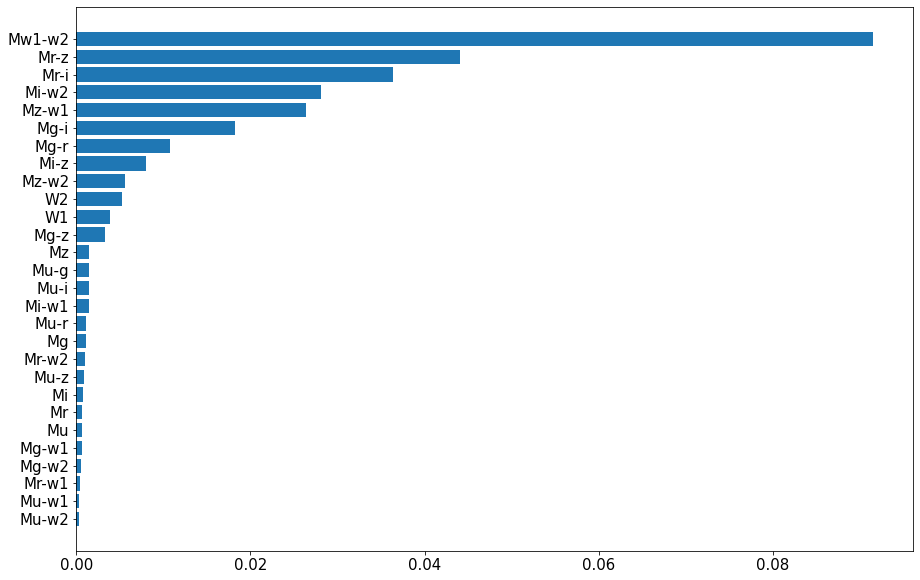

In [40]:
print(np.array(featureImport).shape)

arrimp = np.array(featureImport).mean(0)
print(arrimp.shape)
print(arrimp)

pyplot.rcParams["figure.figsize"] = (15,10)# 'xtick.labelsize', 'ytick.labelsize'
pyplot.rcParams['ytick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
pyplot.rcParams['xtick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
pyplot.rcParams['axes.labelsize'] = 15
pyplot.rcParams['axes.titlesize'] = 15
sorted_idx = arrimp.argsort()

pyplot.barh(attrNames[sorted_idx], arrimp[sorted_idx])
# pyplot.barh(range(35), arrimp)

pyplot.show()

In [41]:
print(attrNames[sorted_idx][-7:])

['Mg-r' 'Mg-i' 'Mz-w1' 'Mi-w2' 'Mr-i' 'Mr-z' 'Mw1-w2']


for some reason, I decided to take only the first 7 features, which I will focus on the analysis and the classification task. you can try 8 if you want

In [42]:
X_imp = X[attrNames[sorted_idx][-7:]]
data_imp = cleanedData_Model [attrNames[sorted_idx][-7:]]
data_imp = data_imp.join(cleanedData_Model [['specclass']])

In [43]:
print(X_imp.head(3))
print(X_imp.shape)

       Mg-r      Mg-i     Mz-w1     Mi-w2      Mr-i      Mr-z  Mw1-w2
0  0.023823  0.257544  0.428691  1.057434  0.233721  0.396463   0.466
1  1.036694  1.749788  0.359858  0.271259  0.713095  1.034496  -0.410
2  1.780769  2.657402  0.782175  0.663311  0.876633  1.407768  -0.650
(3500958, 7)


The above is my final data set :D, now I need to save them to work with them in the next tutorial (notebook)

In [44]:
%store X_imp
%store y
%store data_imp

Stored 'X_imp' (DataFrame)
Stored 'y' (ndarray)
Stored 'data_imp' (DataFrame)
